In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Anti_dataset.csv')

In [5]:
df

,ANTI_A,ANTI_B,V1
0,2.77,98.1,6.0
1,9.79,16.8,6.7
2,9.29,13.6,7.5
3,3.41,1.6,7.6
4,9.83,55.3,8.4
5,5.76,94.4,9.3
6,2.73,67.2,9.4
7,0.17,41.9,9.6
8,7.50,22.7,10.6
9,0.21,39.6,11.2


In [8]:
max_ = max(df['V1'])
min_ = min(df['V1'])
range_ = max_-min_
interval = range_/5    # 5 bins with equal width

In [23]:
equi_width_bins = []
for i in range(5):
    equi_width_bins.append([])
for num in df['V1']:
    if num < interval:
        equi_width_bins[0].append(num)
    elif num >= interval and num<interval*2:
        equi_width_bins[1].append(num)
    elif num >= interval*2 and num<interval*3:
        equi_width_bins[2].append(num)
    elif num >= interval*3 and num<interval*4:
        equi_width_bins[3].append(num)
    else:
        equi_width_bins[-1].append(num)

for i in range(1,6):
    print(f"Group {i} : {equi_width_bins[i-1]}")

Group 1 : [6.0, 6.7, 7.5, 7.6, 8.4, 9.3, 9.4, 9.6, 10.6, 11.2, 11.3, 11.5, 11.5, 11.9, 13.0, 13.8, 14.1, 14.9, 15.2, 15.8, 16.5]
Group 2 : [17.7, 21.4]
Group 3 : []
Group 4 : [55.5, 60.0, 61.4, 62.1, 64.9, 64.9]
Group 5 : [69.0, 70.1, 73.4, 74.9, 76.8, 77.0, 77.9, 80.1, 81.2, 83.8, 90.7]


In [41]:
sorted_list  = sorted(df['V1'])
print(len(sorted_list))


40


In [45]:
equi_depth_bins = []
rows = 40
depth = 40//5
freq = 0 + depth
low_idx = 0
while freq<=rows :
    
    ls = sorted_list[low_idx:freq]
    equi_depth_bins.append(ls)
    low_idx += depth
    freq += depth



In [46]:
print(len(equi_depth_bins))
for bins in equi_depth_bins:
    print(bins)

5
[6.0, 6.7, 7.5, 7.6, 8.4, 9.3, 9.4, 9.6]
[10.6, 11.2, 11.3, 11.5, 11.5, 11.9, 13.0, 13.8]
[14.1, 14.9, 15.2, 15.8, 16.5, 17.7, 21.4, 55.5]
[60.0, 61.4, 62.1, 64.9, 64.9, 69.0, 70.1, 73.4]
[74.9, 76.8, 77.0, 77.9, 80.1, 81.2, 83.8, 90.7]


In [47]:
df.describe()

,ANTI_A,ANTI_B,V1
count,40.000000,40.000000,40.000000
mean,5.116250,49.577500,37.465000
std,3.157834,31.436003,30.809885
min,0.170000,1.600000,6.000000
25%,2.582500,19.650000,11.275000
50%,5.415000,50.450000,16.150000
75%,7.522500,80.025000,69.275000
max,9.940000,98.800000,90.700000


<Axes: xlabel='ANTI_A'>

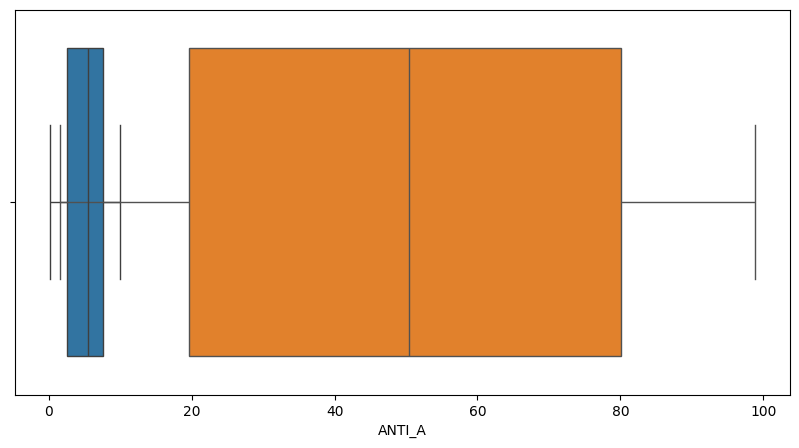

In [57]:
fig, axes = plt.subplots(figsize=(10,5))
sns.boxplot(data = df, x = df['ANTI_A'])
sns.boxplot(data = df, x = df['ANTI_B'])

<Axes: xlabel='V1'>

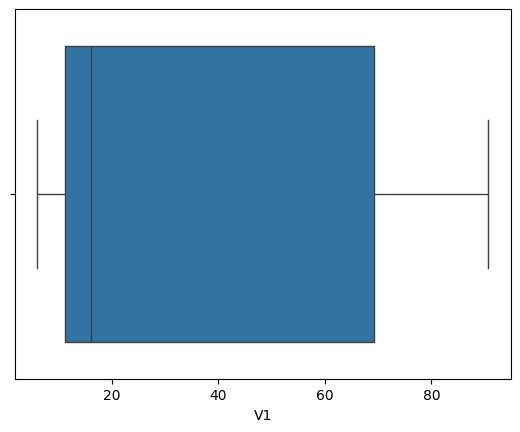

In [58]:
sns.boxplot(data = df, x = df['V1'])

In [66]:
def minMax_normalization(df, normalized_list,col_name:str):
    max_ = max(df[col_name])
    min_ = min(df[col_name])
    diff = max_-min_
    for entry in df[col_name]:
        normalized_list.append((entry-min_)/(diff))


normalized_a = []
minMax_normalization(df,normalized_a,col_name='ANTI_A')
print(normalized_a)




[0.2661207778915046, 0.984646878198567, 0.9334698055271238, 0.3316274309109519, 0.9887410440122826, 0.5721596724667349, 0.26202661207778916, 0.0, 0.7502558853633573, 0.004094165813715454, 0.05015353121801433, 0.27328556806550663, 0.7911975435005119, 0.1873080859774821, 0.5015353121801434, 0.20163766632548621, 1.0, 0.7205731832139202, 0.4339815762538383, 0.8730808597748209, 0.2947799385875128, 0.9385875127942682, 0.7359263050153532, 0.7799385875127943, 0.41658137154554764, 0.04708290685772774, 0.12896622313203684, 0.1299897645854657, 0.7338792221084954, 0.16069600818833163, 0.609007164790174, 0.759467758444217, 0.7308085977482088, 0.7164790174002047, 0.28863868986693964, 0.27328556806550663, 0.0511770726714432, 0.8648925281473899, 0.7441146366427841, 0.7205731832139202]


In [67]:
normalized_b = []
minMax_normalization(df,normalized_b, col_name='ANTI_B')

Text(0.5, 0, 'Anti_B')

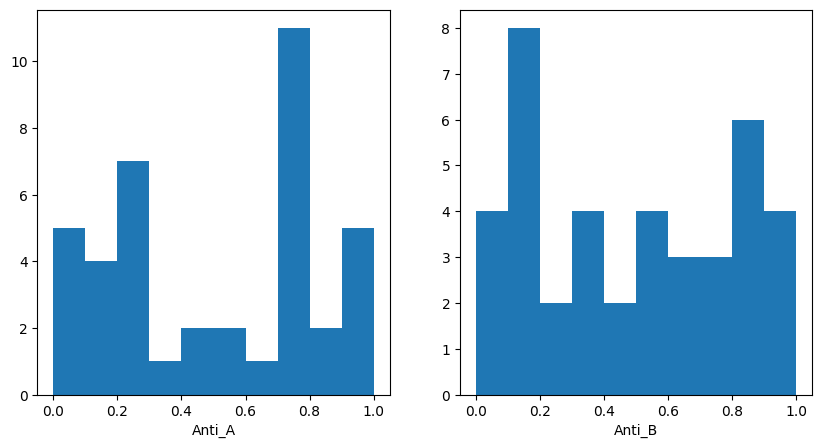

In [75]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].hist(normalized_a)
axes[1].hist(normalized_b)

axes[0].set_xlabel('Anti_A')
axes[1].set_xlabel('Anti_B')